# 버섯분류 데이터 셋

In [1]:
import os

# os.chdir -> 데이터가 저장된 경로
os.chdir('../../../../data/02_mushroom/mushroom')

import pandas as pd
import matplotlib.pyplot as plt

```{admonition} Question 1
:class: error
**데이터를 df변수에 입력받고 각 열의 중복되지않는 원소의 수로 구성된 데이터 프레임을 형성하라. uniqueDf 변수에 저장하고 개수에 따른 내림차순 정렬 후  상위 3개 데이터를 출력하라**
```

In [344]:
df = pd.read_csv('mushpre.csv')

In [345]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,habitat
0,p,x,s,n,f,w,w,p,w,o,u
1,e,x,s,y,f,w,w,p,w,o,g
2,e,b,s,w,f,w,w,p,w,o,m


In [348]:
uniqueDf.head(3)

,className,Counts
3,cap-color,10
5,stalk-color-above-ring,9
6,stalk-color-below-ring,9


```{admonition} Question 2
:class: error
**종속변수를 y (class)와 독립변수를 x 의 변수에 저장하여라. 변수타입 중 'veil-color'는 value 값이 1가지밖에 없으므로 제거하고 사용한다**
```

In [502]:
y.head(3)

0    0
1    1
2    1
Name: class, dtype: int64

In [503]:
x.head(3)

,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,habitat
0,x,s,n,f,w,w,w,o,u
1,x,s,y,f,w,w,w,o,g
2,b,s,w,f,w,w,w,o,m


```{admonition} Question 2
:class: error
**독립변수 x를 LabelEncoding하여 x_label변수에 저장하라**
```

In [506]:
x_label.head(3)

,cap-shape,cap-surface,cap-color,gill-attachment,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,habitat
0,5,2,4,1,7,7,2,1,5
1,5,2,9,1,7,7,2,1,1
2,0,2,8,1,7,7,2,1,3


```{admonition} Question 3
:class: error
**훈련 데이터셋과 테스트 데이터를 7:3으로 나누고 층화추출하여라**
```

In [560]:
X_train.shape  ,X_test.shape ,y_train.shape ,y_test.shape

((5686, 9), (2438, 9), (5686,), (2438,))

In [561]:
y_train.value_counts()

1    2945
0    2741
Name: class, dtype: int64

```{admonition} Question 4
:class: error
**SMOTE 방식을 이용하여 훈련 데이터의 부족한 종속변수 class를 over sampling 하라**
```

In [564]:
y_train_over.value_counts()

0    2945
1    2945
Name: class, dtype: int64

```{admonition} Question 5
:class: error
**랜덤포레스트 방식을 이용하여 분류모델을 만들고 학습하라. 모델평가를 테스트셋으로 진행하고 accuracy, precision, recall 값을 구하여라**
```

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [566]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [567]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.82      0.61      0.70      1175
     class 1       0.71      0.88      0.78      1263

    accuracy                           0.75      2438
   macro avg       0.77      0.74      0.74      2438
weighted avg       0.76      0.75      0.74      2438



```{admonition} Question 6
:class: error
**테스트셋에 대해 ROC커브를 그리고 auc 값을 측정하라**
```

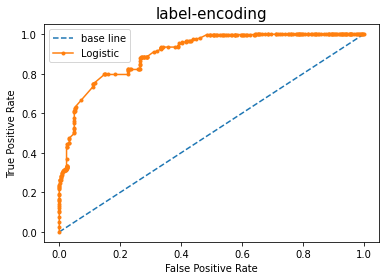

base line: ROC AUC=0.500
pred: ROC AUC=0.905


In [581]:
lr_probs = clf.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_auc_score ,roc_curve

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='base line')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('label-encoding',fontsize=15)
plt.legend()
plt.show()
print('base line: ROC AUC=%.3f' % (ns_auc))
print('pred: ROC AUC=%.3f' % (lr_auc))

```{admonition} Question 7
:class: error
**학습한 모델의 변수 중요도를 아래의 그래프 처럼 출력하라**
```

In [570]:
importance = clf.feature_importances_

In [571]:
importanceDf = pd.DataFrame({'name':x.columns,'impor':importance}).sort_values('impor',ascending=False)

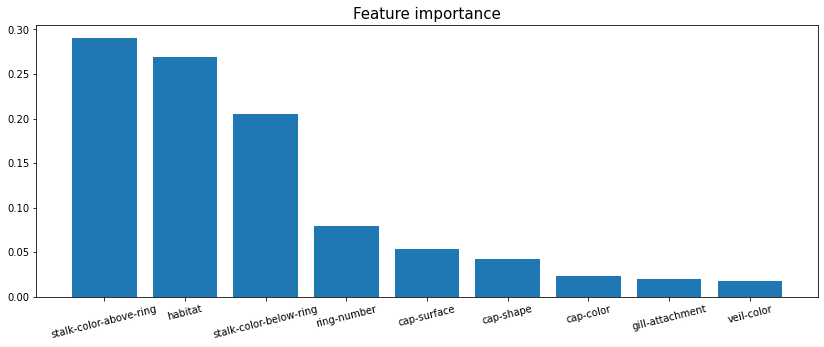

In [572]:
plt.figure(figsize=(14,5))
plt.bar(importanceDf.name,importanceDf.impor)
plt.xticks(rotation=14)
plt.title('Feature importance',fontsize=15)
plt.show()

```{admonition} Question 8
:class: error
**독립변수를 Label encoding 방식이 아닌 one-hot encoding 방식으로 데이터를 변환 하여 x_dum 변수에 저장하라**
```

In [573]:
x_dum = pd.get_dummies(x)

In [574]:
x_dum.head(3)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,ring-number_n,ring-number_o,ring-number_t,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


```{admonition} Question 9
:class: error
**위의 학습 과정을 반복한다. 기존에 사용한 random_state값은 고정한다 smote 층화추출, randomforest 학습, 모델 평가 ,roc 커브 , auc값 추출**
```

In [575]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_dum, y, test_size=0.3, random_state=60,stratify=y)

In [576]:
smote = SMOTE(random_state=0)
#X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [577]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.69      0.77      1175
     class 1       0.76      0.91      0.83      1263

    accuracy                           0.80      2438
   macro avg       0.82      0.80      0.80      2438
weighted avg       0.82      0.80      0.80      2438



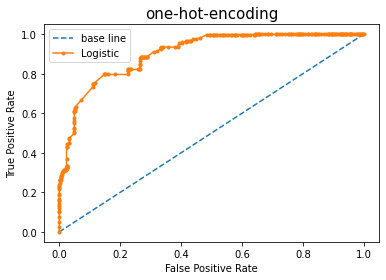

base line: ROC AUC=0.500
pred: ROC AUC=0.905


In [580]:
lr_probs = clf.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_auc_score ,roc_curve

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='base line')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('one-hot-encoding',fontsize=15)
plt.show()
print('base line: ROC AUC=%.3f' % (ns_auc))
print('pred: ROC AUC=%.3f' % (lr_auc))

In [ ]:
ㅇㅇ